In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_9412\2413589443.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("Amazon Sale Report.csv",encoding="unicode escape")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [12]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [17]:
df.shape


(128976, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [20]:
df.drop(['New','PendingS'],axis=1,inplace=True)

In [22]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [23]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

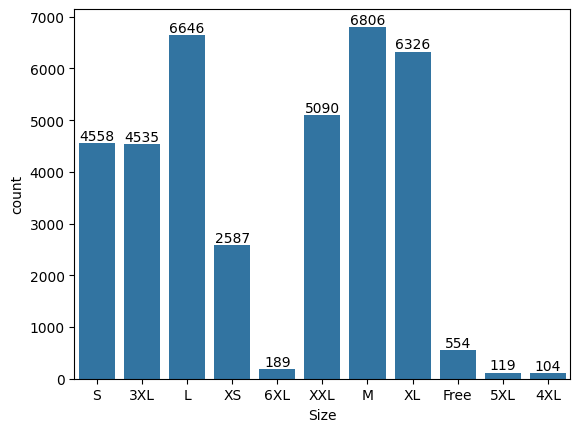

In [31]:
ax=sns.countplot(x='Size',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
sales_Qty=df.groupby(['Size'],as_index= False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sales_Qty

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Qty'>

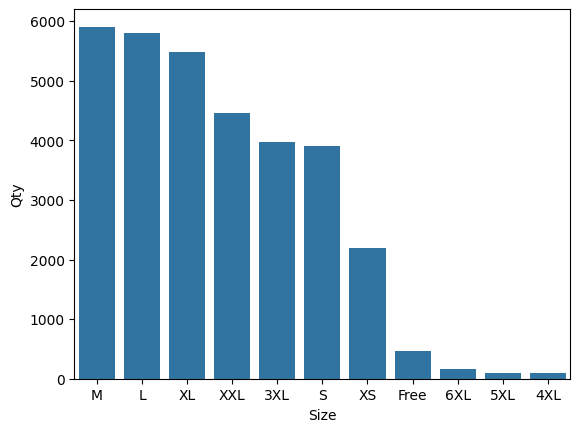

In [37]:
sns.barplot(x='Size',y='Qty', data=sales_Qty)

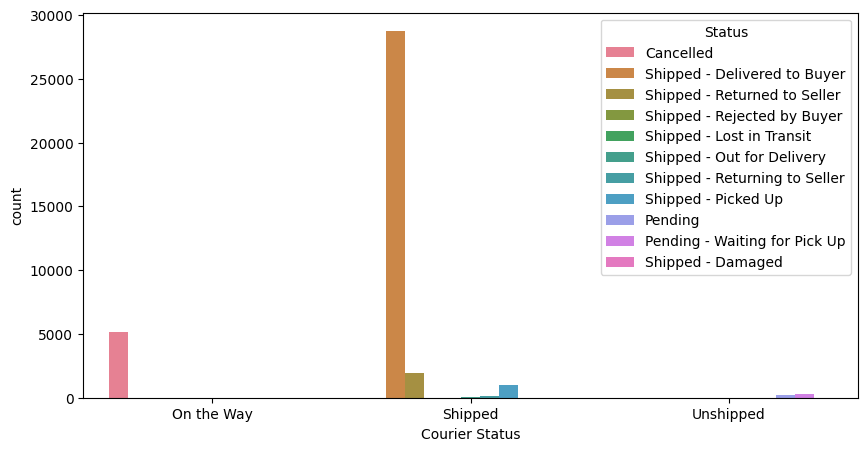

In [43]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Courier Status',hue='Status',data=df)
plt.show()

<Axes: >

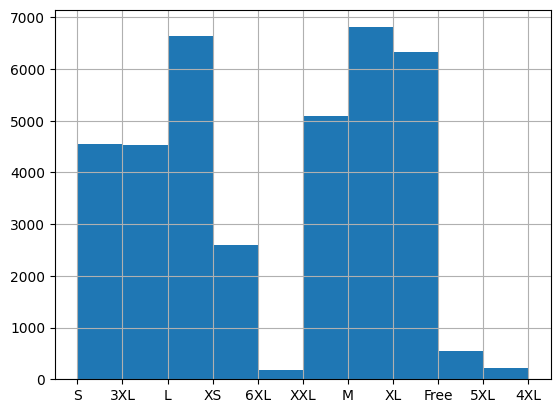

In [44]:
df['Size'].hist()

In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

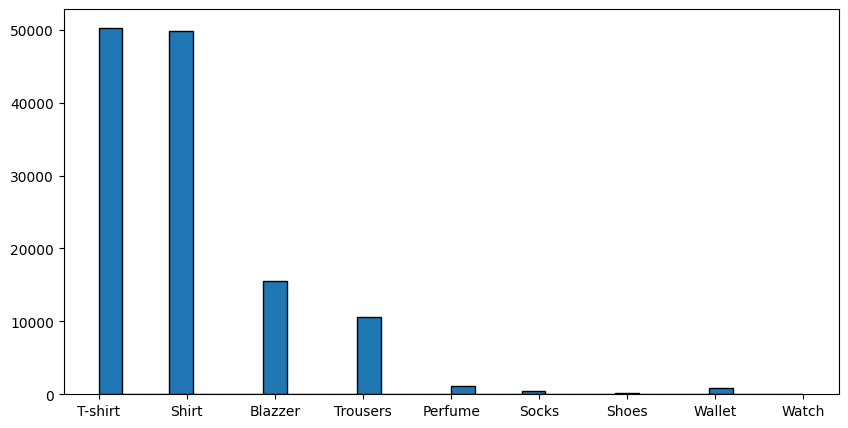

In [14]:
df['Category']=df['Category'].astype(str)
columns_data=df['Category']
plt.figure(figsize=(10,5))
plt.hist(columns_data,bins=30,edgecolor='Black')
#plt.xticks(rotation=90)
plt.show


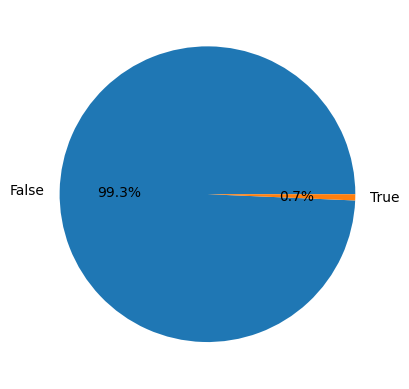

In [21]:
B2B_check=df['B2B'].value_counts()
plt.pie(B2B_check,labels=B2B_check.index,autopct="%1.1f%%")
plt.show()

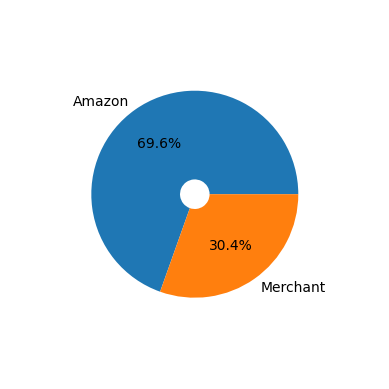

In [25]:
a1=df['Fulfilment'].value_counts()
fig,ax=plt.subplots()
ax.pie(a1,labels=a1.index,autopct="%1.1f%%",radius=0.7,wedgeprops=dict(width=0.6))
ax.set(aspect="equal")
plt.show()

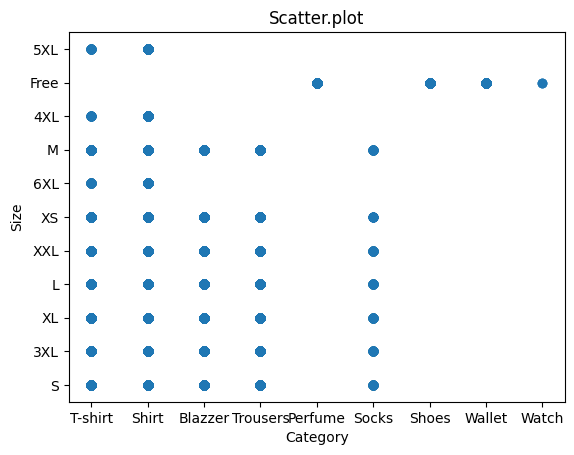

In [28]:
x_data=df['Category']
y_data=df['Size']
plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter.plot')
plt.show()

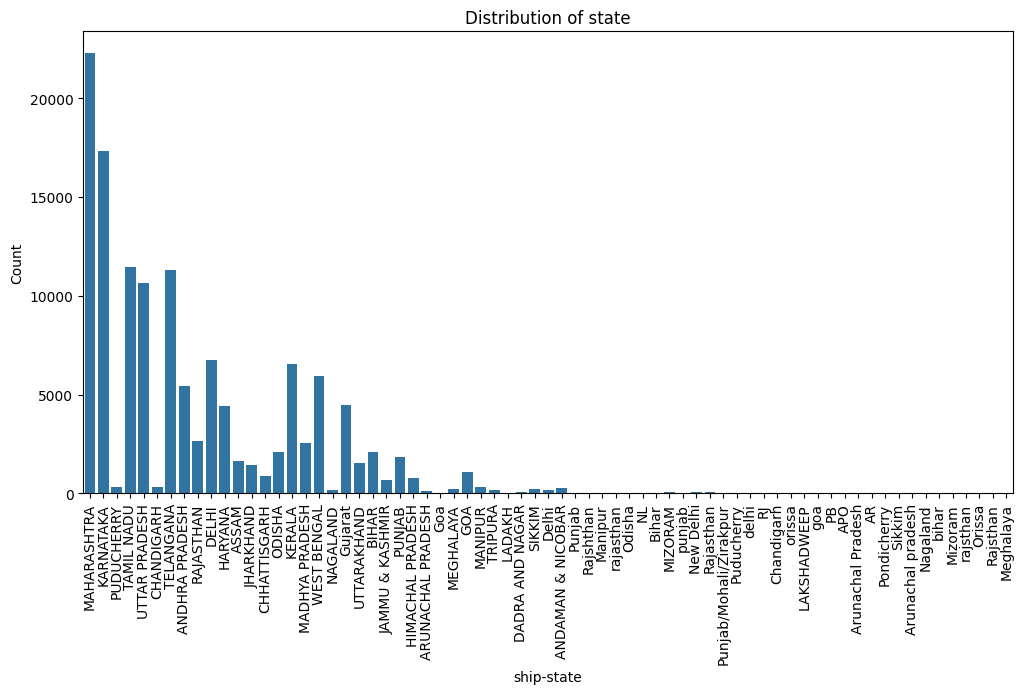

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('ship-state',)
plt.ylabel('Count')
plt.title("Distribution of state")
plt.xticks(rotation=90)
plt.show()